# 05_02: Loading Weather Data

In [1]:
import math
import collections
import urllib.request

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

#%matplotlib inline

In [2]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt',
                           'readme.txt')

('readme.txt', <http.client.HTTPMessage at 0x13afafb26c0>)

In [3]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt',
                           'stations.txt')

('stations.txt', <http.client.HTTPMessage at 0x13afafb31a0>)

    IV. FORMAT OF "ghcnd-stations.txt"

    ------------------------------
    Variable   Columns   Type
    ------------------------------
    ID            1-11   Character
    LATITUDE     13-20   Real
    LONGITUDE    22-30   Real
    ELEVATION    32-37   Real
    STATE        39-40   Character
    NAME         42-71   Character
    GSN FLAG     73-75   Character
    HCN/CRN FLAG 77-79   Character
    WMO ID       81-85   Character
    ------------------------------


In [4]:
# loading a fixed-width text file: we prescribe the widths of every field;
# the names of the resulting array columns; their datatypes. 'Uxx' stands
# for unicode string of length xx; 'd' for double precision floating point

stations = np.genfromtxt('stations.txt', delimiter=[11,9,10,7,3,31,4,4,6],
                                         names=['id','latitude','longitude','elevation','state','name',
                                                'gsn','hcn','wmo'],
                                         dtype=['U11','d','d','d','U3','U31','U4','U4','U6'],
                                         autostrip=True)

In [5]:
len(stations)

129657

In [6]:
stations

array([('ACW00011604',  17.1167, -61.7833,   10.1, '', 'ST JOHNS COOLIDGE FLD', '', '', ''),
       ('ACW00011647',  17.1333, -61.7833,   19.2, '', 'ST JOHNS', '', '', ''),
       ('AE000041196',  25.333 ,  55.517 ,   34. , '', 'SHARJAH INTER. AIRP', 'GSN', '', '41196'),
       ...,
       ('ZI000067977', -21.017 ,  31.583 ,  430. , '', 'BUFFALO RANGE', '', '', '67977'),
       ('ZI000067983', -20.2   ,  32.616 , 1132. , '', 'CHIPINGE', 'GSN', '', '67983'),
       ('ZI000067991', -22.217 ,  30.    ,  457. , '', 'BEITBRIDGE', '', '', '67991')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])

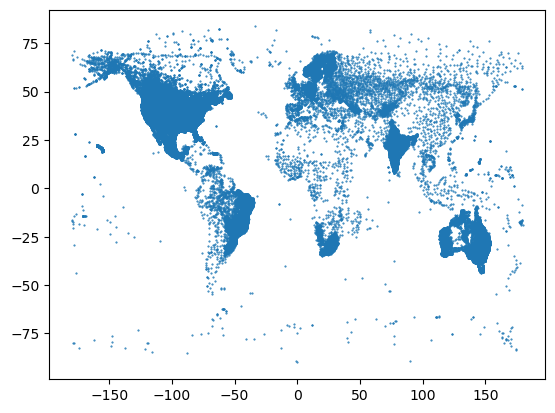

In [7]:
pp.plot(stations['longitude'], stations['latitude'], '.', markersize=1)
pp.show()

In [23]:
stations_ca = stations[stations['state'] == 'CA']

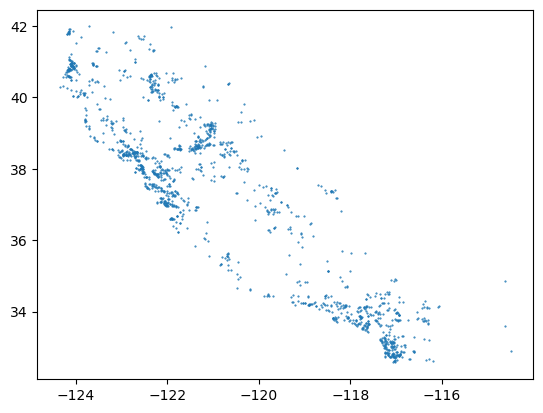

In [27]:
pp.plot(stations_ca['longitude'], stations_ca['latitude'], '.', markersize=1)
pp.show()

In [13]:
stations[stations['name'] == 'PASADENA']

array([],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])

In [14]:
stations[np.char.find(stations['name'], 'PASADENA') == 0]

array([('CA1NL000026', 49.0094,  -57.5849,  52.4, 'NL', 'PASADENA 0.5 SE', '', '', ''),
       ('US1CALA0036', 34.1392, -118.1161, 225.2, 'CA', 'PASADENA 2.0 SE', '', '', ''),
       ('US1CALA0043', 34.1619, -118.1073, 277.7, 'CA', 'PASADENA 1.8 E', '', '', ''),
       ('US1CALA0091', 34.1648, -118.1249, 289. , 'CA', 'PASADENA 0.8 ENE', '', '', ''),
       ('US1CALA0124', 34.1336, -118.1416, 234.1, 'CA', 'PASADENA 1.9 S', '', '', ''),
       ('US1MDAA0010', 39.1038,  -76.5443,  13.1, 'MD', 'PASADENA 0.7 SE', '', '', ''),
       ('US1MDAA0013', 39.1263,  -76.5596,  18.9, 'MD', 'PASADENA 1.1 NNW', '', '', ''),
       ('US1MDAA0039', 39.0916,  -76.5112,  10.7, 'MD', 'PASADENA 2.6 ESE', '', '', '')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])

In [15]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/USC00046719.dly', 'PASADENA.dly')

('PASADENA.dly', <http.client.HTTPMessage at 0x16d871f3e60>)

In [16]:
import getweather

In [17]:
help(getweather.getyear)

Help on function getyear in module getweather:

getyear(station_name, elements, year)
    Make a NumPy record array of length 365, containing weather data
    at station_name for the list of requested elements (TMIN/TMAX/PRCP/SNOW),
    restricted to year.

    If station_name is not in the list, find a station that _begins_
    with station_name, but give precedence to HCN and GSN stations.



In [18]:
getweather.getyear('PASADENA', ['TMIN','TMAX'], 2000)

array([( 6.1, 14.4), ( 6.1, 18.3), ( 3.9, 18.3), ( 6.1, 20. ),
       ( 6.1, 20.6), ( 5.6, 20. ), ( 5.6, 18.3), ( 3.3, 21.7),
       ( 5. , 20.6), ( 6.1, 18.3), ( 6.7, 18.9), ( 8.3, 17.8),
       ( 7.8, 24.4), (11.1, 26.1), (12.8, 26.1), (13.3, 23.9),
       (13.3, 20.6), (13.9, 24.4), (11.1, 25.6), (12.8, 21.7),
       (11.7, 18.3), (10. , 18.3), ( 7.8, 20. ), (11.7, 22.8),
       (12.2, 21.7), ( 8.3, 20.6), ( 7.2, 20.6), ( 6.1, 21.7),
       ( 6.7, 21.7), (10. , 17.8), (11.1, 16.7), (13.3, 24.4),
       (11.1, 26.7), ( 9.4, 26.7), ( 8.9, 23.9), (10.6, 21.1),
       ( 6.7, 25. ), ( nan,  nan), (15.6, 26.7), (10. , 23.9),
       (10.6, 19.4), ( 5. , 18.3), ( 9.4, 17.8), ( 9.4, 15.6),
       (10.6, 16.7), ( 8.9, 19.4), (10. , 16.7), ( 7.2, 17.2),
       ( 6.1, 22.2), ( 7.8, 25. ), ( 9.4, 23.9), ( 6.7, 13.3),
       ( 7.2, 13.9), ( 7.8, 12.8), ( 2.8, 16.1), ( 8.3, 15. ),
       ( 5.6, 21.7), ( 8.3, 20.6), ( 4.4, 17.2), ( 7.2, 18.3),
       ( 6.7, 19.4), ( 7.2, 22.2), (17.2, 20. ), ( 7.2,